In [1]:
"C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"
### Sales Analysis and Prediction ###
### ADITYA KUMAR ROY ###


[1] "C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"

In [3]:
## LOADING LIBRARY PACKAGES 
library(ggplot2)
library(lubridate)
library(moments)
library(car)
library(lmtest)
library(sandwich)
library(graphics)
library(caret)
library(Metrics)
library(patchwork)
library(gridExtra)
library(grid)
library(randomForest)

In [4]:
## READING THE DATA & DATA PREPROCESSING
Sales <- read.csv("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog/Advertising.csv")
head(Sales)
tail(Sales)
summary(Sales)
str(Sales)

,X,TV,Radio,Newspaper,Sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


,X,TV,Radio,Newspaper,Sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
195,195,149.7,35.6,6.0,17.3
196,196,38.2,3.7,13.8,7.6
197,197,94.2,4.9,8.1,9.7
198,198,177.0,9.3,6.4,12.8
199,199,283.6,42.0,66.2,25.5
200,200,232.1,8.6,8.7,13.4


       X                TV             Radio          Newspaper     
 Min.   :  1.00   Min.   :  0.70   Min.   : 0.000   Min.   :  0.30  
 1st Qu.: 50.75   1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75  
 Median :100.50   Median :149.75   Median :22.900   Median : 25.75  
 Mean   :100.50   Mean   :147.04   Mean   :23.264   Mean   : 30.55  
 3rd Qu.:150.25   3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10  
 Max.   :200.00   Max.   :296.40   Max.   :49.600   Max.   :114.00  
     Sales      
 Min.   : 1.60  
 1st Qu.:10.38  
 Median :12.90  
 Mean   :14.02  
 3rd Qu.:17.40  
 Max.   :27.00  

'data.frame':	200 obs. of  5 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


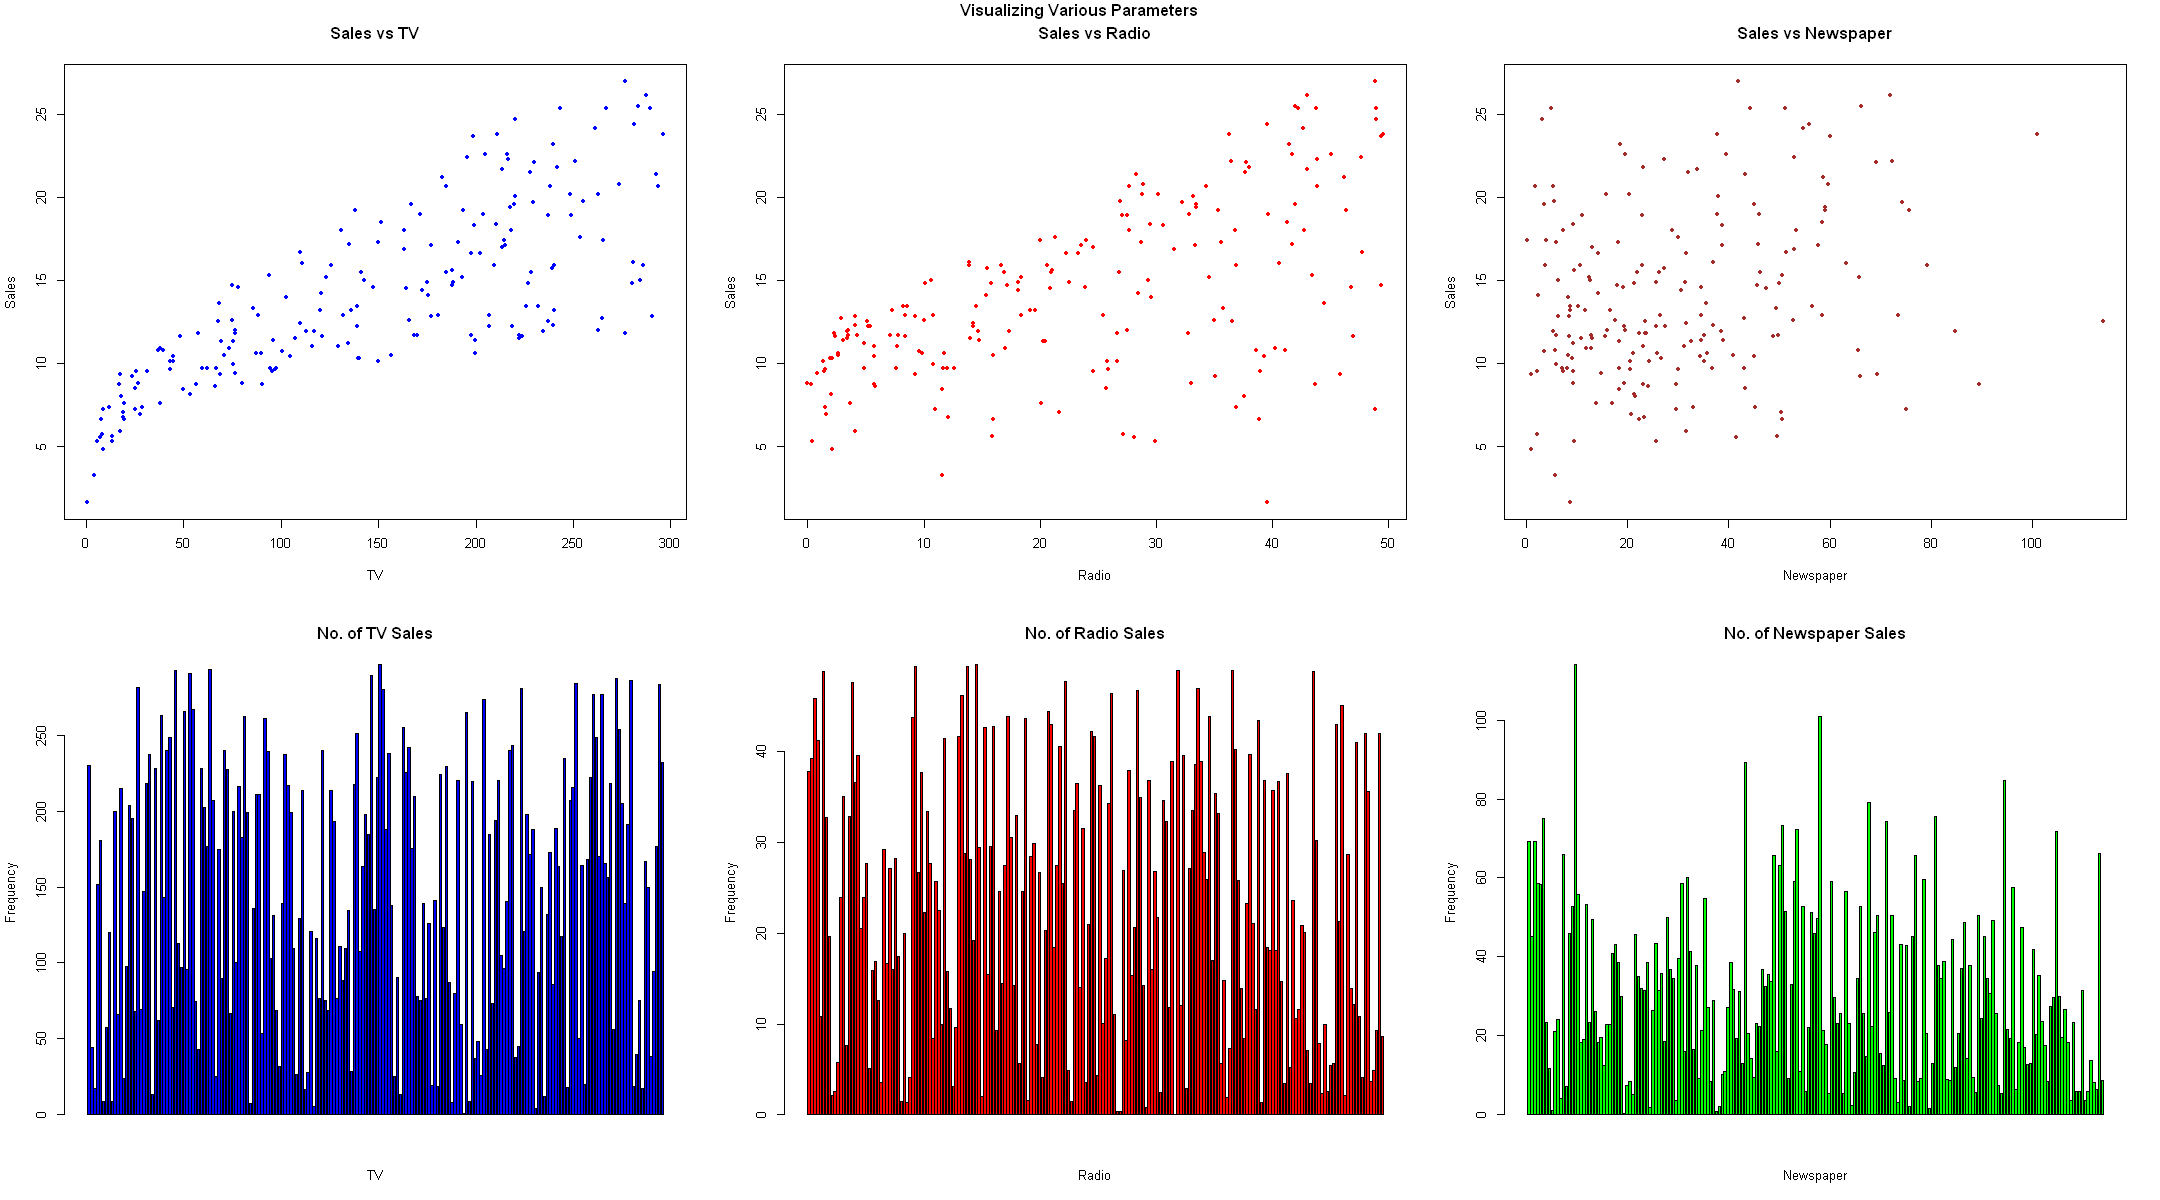

In [5]:
## EXPLORATORY DATA ANALYSIS
# Set the size of the plotting window
par(mfrow = c(2,3))
library(repr)
options(repr.plot.width = 18, repr.plot.height = 10)

#visualizing different parameters for analysis.
plot(x= Sales$TV,y= Sales$Sales,main = "Sales vs TV",
     xlab = "TV",ylab = "Sales",type = "p",col = "blue",pch = 20)

plot(x= Sales$Radio,y= Sales$Sales,main = "Sales vs Radio",
     xlab = "Radio",ylab = "Sales",type = "p",col = "red",pch = 20)

plot(x= Sales$Newspaper,y= Sales$Sales,main = "Sales vs Newspaper",
     xlab = "Newspaper",ylab = "Sales",type = "p",col = "brown",pch = 20)

barplot( Sales$TV,main = "No. of TV Sales",
     xlab = "TV",ylab = "Frequency",col = "blue")

barplot( Sales$Radio,main = "No. of Radio Sales",
         xlab = "Radio",ylab = "Frequency",col = "red")

barplot( Sales$Newspaper,main = "No. of Newspaper Sales",
         xlab = "Newspaper",ylab = "Frequency",col = "green")

title(main = "Visualizing Various Parameters",outer = TRUE,line = -1)

,Sales,TV,Radio,Newspaper
,<dbl>,<dbl>,<dbl>,<dbl>
1,22.1,230.1,37.8,69.2
2,10.4,44.5,39.3,45.1
3,9.3,17.2,45.9,69.3
4,18.5,151.5,41.3,58.5
5,12.9,180.8,10.8,58.4
6,7.2,8.7,48.9,75.0


,Sales,TV,Radio,Newspaper
Sales,1.0000000,0.78222442,0.57622257,0.22829903
TV,0.7822244,1.00000000,0.05480866,0.05664787
Radio,0.5762226,0.05480866,1.00000000,0.35410375
Newspaper,0.2282990,0.05664787,0.35410375,1.00000000


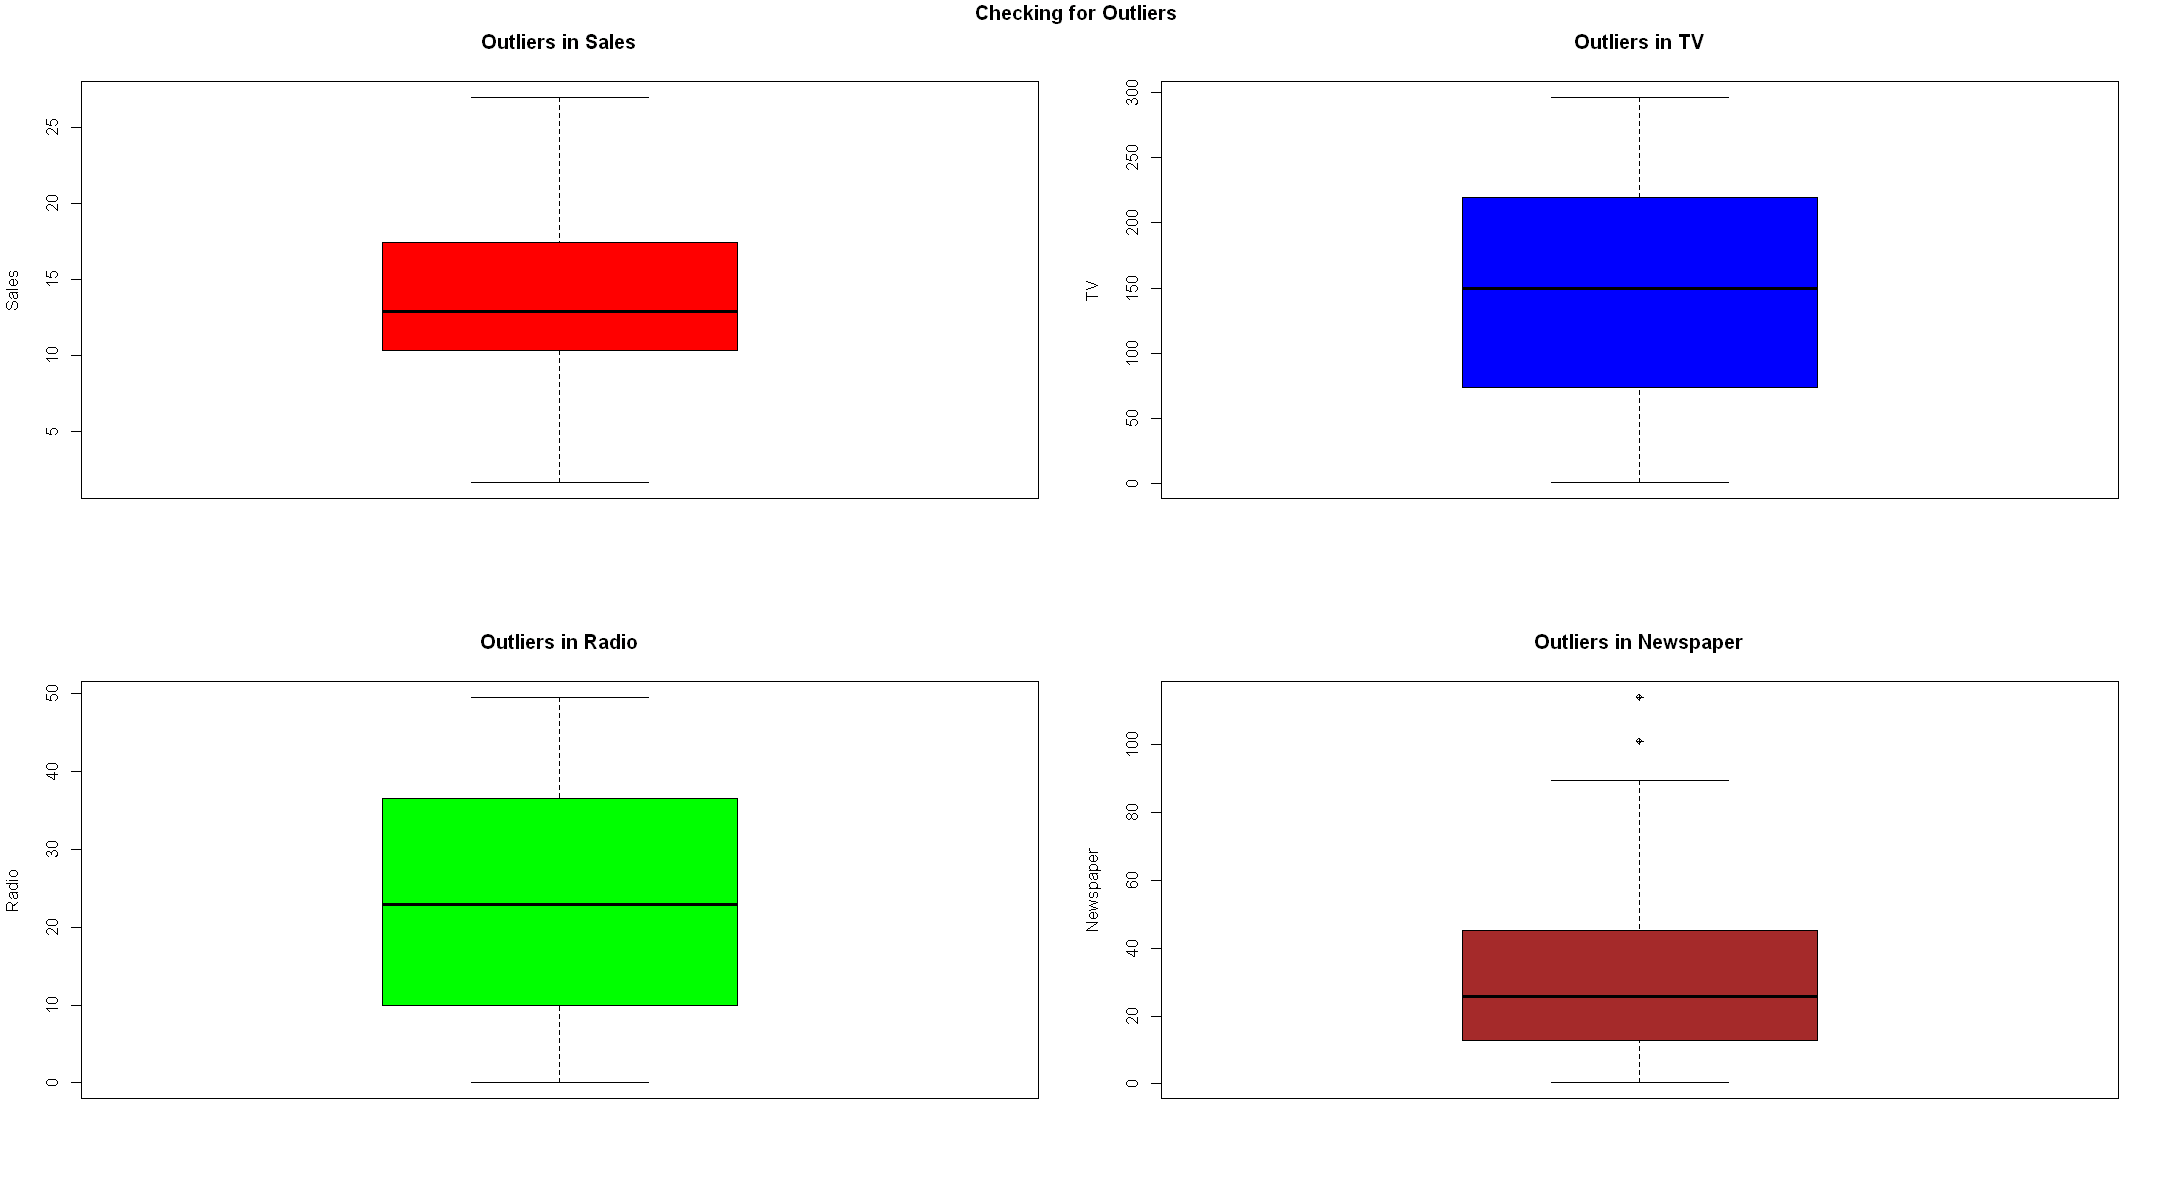

In [6]:
## DATA WRANGLING 
#creating feature matrix
Sales_data <- cbind.data.frame(Sales$Sales,Sales$TV,
                               Sales$Radio,Sales$Newspaper)
colnames(Sales_data) <- c("Sales","TV","Radio","Newspaper")
head(Sales_data)

# finding correlation
cor(Sales_data)

#checking for outliers
par(mfrow = c(2,2))
library(repr)
options(repr.plot.width = 18, repr.plot.height = 10)

boxplot(Sales$Sales,main = "Outliers in Sales",
        ylab = "Sales",col = "red",pch = 10) 

boxplot(Sales$TV,main = "Outliers in TV",
        ylab = "TV",col = "blue",pch = 10) 

boxplot(Sales$Radio,main = "Outliers in Radio",
        ylab = "Radio",col = "green",pch = 10) 

boxplot(Sales$Newspaper,main = "Outliers in Newspaper",
        ylab = "Newspaper",col = "brown",pch = 10) 

title(main = "Checking for Outliers ",outer = TRUE,line = -1)
## THERE ARE TWO OUTLIERS IN THE NEWSPAPER COLUMN ## 
## HENCE OUTLIERS WONT INFLUENCE THE PREDICTION MUCH ##




In [7]:
## Still for verification we will remove the outliers and check it .
# removing outliers
remove_outliers<- function(df) {
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      Q1 <- quantile(df[[col]], 0.25)
      Q3 <- quantile(df[[col]], 0.75)
      IQR <- Q3 - Q1
      lower_bound <- Q1 - 1.5 * IQR
      upper_bound <- Q3 + 1.5 * IQR
      df <- df[df[[col]] >= lower_bound & df[[col]] <= upper_bound, ]
    }
  }
  return(df)
}
clean_sales_data <- remove_outliers(Sales_data)
colnames(clean_sales_data) <- c("C_Sales","C_TV","C_Radio","C_Newspaper")
# outliers removed 
head(clean_sales_data)
summary(clean_sales_data)
# checking correlation
cor(clean_sales_data)


,C_Sales,C_TV,C_Radio,C_Newspaper
,<dbl>,<dbl>,<dbl>,<dbl>
1,22.1,230.1,37.8,69.2
2,10.4,44.5,39.3,45.1
3,9.3,17.2,45.9,69.3
4,18.5,151.5,41.3,58.5
5,12.9,180.8,10.8,58.4
6,7.2,8.7,48.9,75.0


    C_Sales           C_TV          C_Radio        C_Newspaper   
 Min.   : 1.60   Min.   :  0.7   Min.   : 0.000   Min.   : 0.30  
 1st Qu.:10.32   1st Qu.: 74.8   1st Qu.: 9.925   1st Qu.:12.65  
 Median :12.90   Median :149.8   Median :22.400   Median :25.60  
 Mean   :13.98   Mean   :146.7   Mean   :23.131   Mean   :29.78  
 3rd Qu.:17.38   3rd Qu.:218.5   3rd Qu.:36.325   3rd Qu.:44.05  
 Max.   :27.00   Max.   :293.6   Max.   :49.600   Max.   :89.40  

,C_Sales,C_TV,C_Radio,C_Newspaper
C_Sales,1.0000000,0.77912086,0.57674768,0.21955468
C_TV,0.7791209,1.00000000,0.05197816,0.04977146
C_Radio,0.5767477,0.05197816,1.00000000,0.34636425
C_Newspaper,0.2195547,0.04977146,0.34636425,1.00000000


In [8]:
## PARTIONING TRAIN & TEST DATASETS
#for model 1 complete features
index1 <- sample(1:nrow(Sales_data),as.integer(0.8*nrow(Sales_data)))
Train1 <- Sales_data[index1,]
Test1 <- Sales_data[-index1,]

# for model 2excluding the outliers
index2 <- sample(1:nrow(clean_sales_data),
                 as.integer(0.8*nrow(clean_sales_data)))
Train2 <- clean_sales_data[index2,]
Test2 <- clean_sales_data[-index2,]


In [9]:
## TRAINING THE MODELS
# model 1
model1 <- lm(Sales ~ . ,data = Sales_data)

#model 2
model2 <- lm(C_Sales ~ . ,data = clean_sales_data)

#model 3
model3 <- randomForest(Sales ~ TV + Radio + Newspaper, data = Train1)


In [10]:
## PREDICTING & TESTING THE MODELS
# model 1
pred1 <- predict(model1,newdata = Test1)

# model 2
pred2 <- predict(model2,newdata = Test2)

#model 3
pred3 <- predict(model3, newdata = Test1)


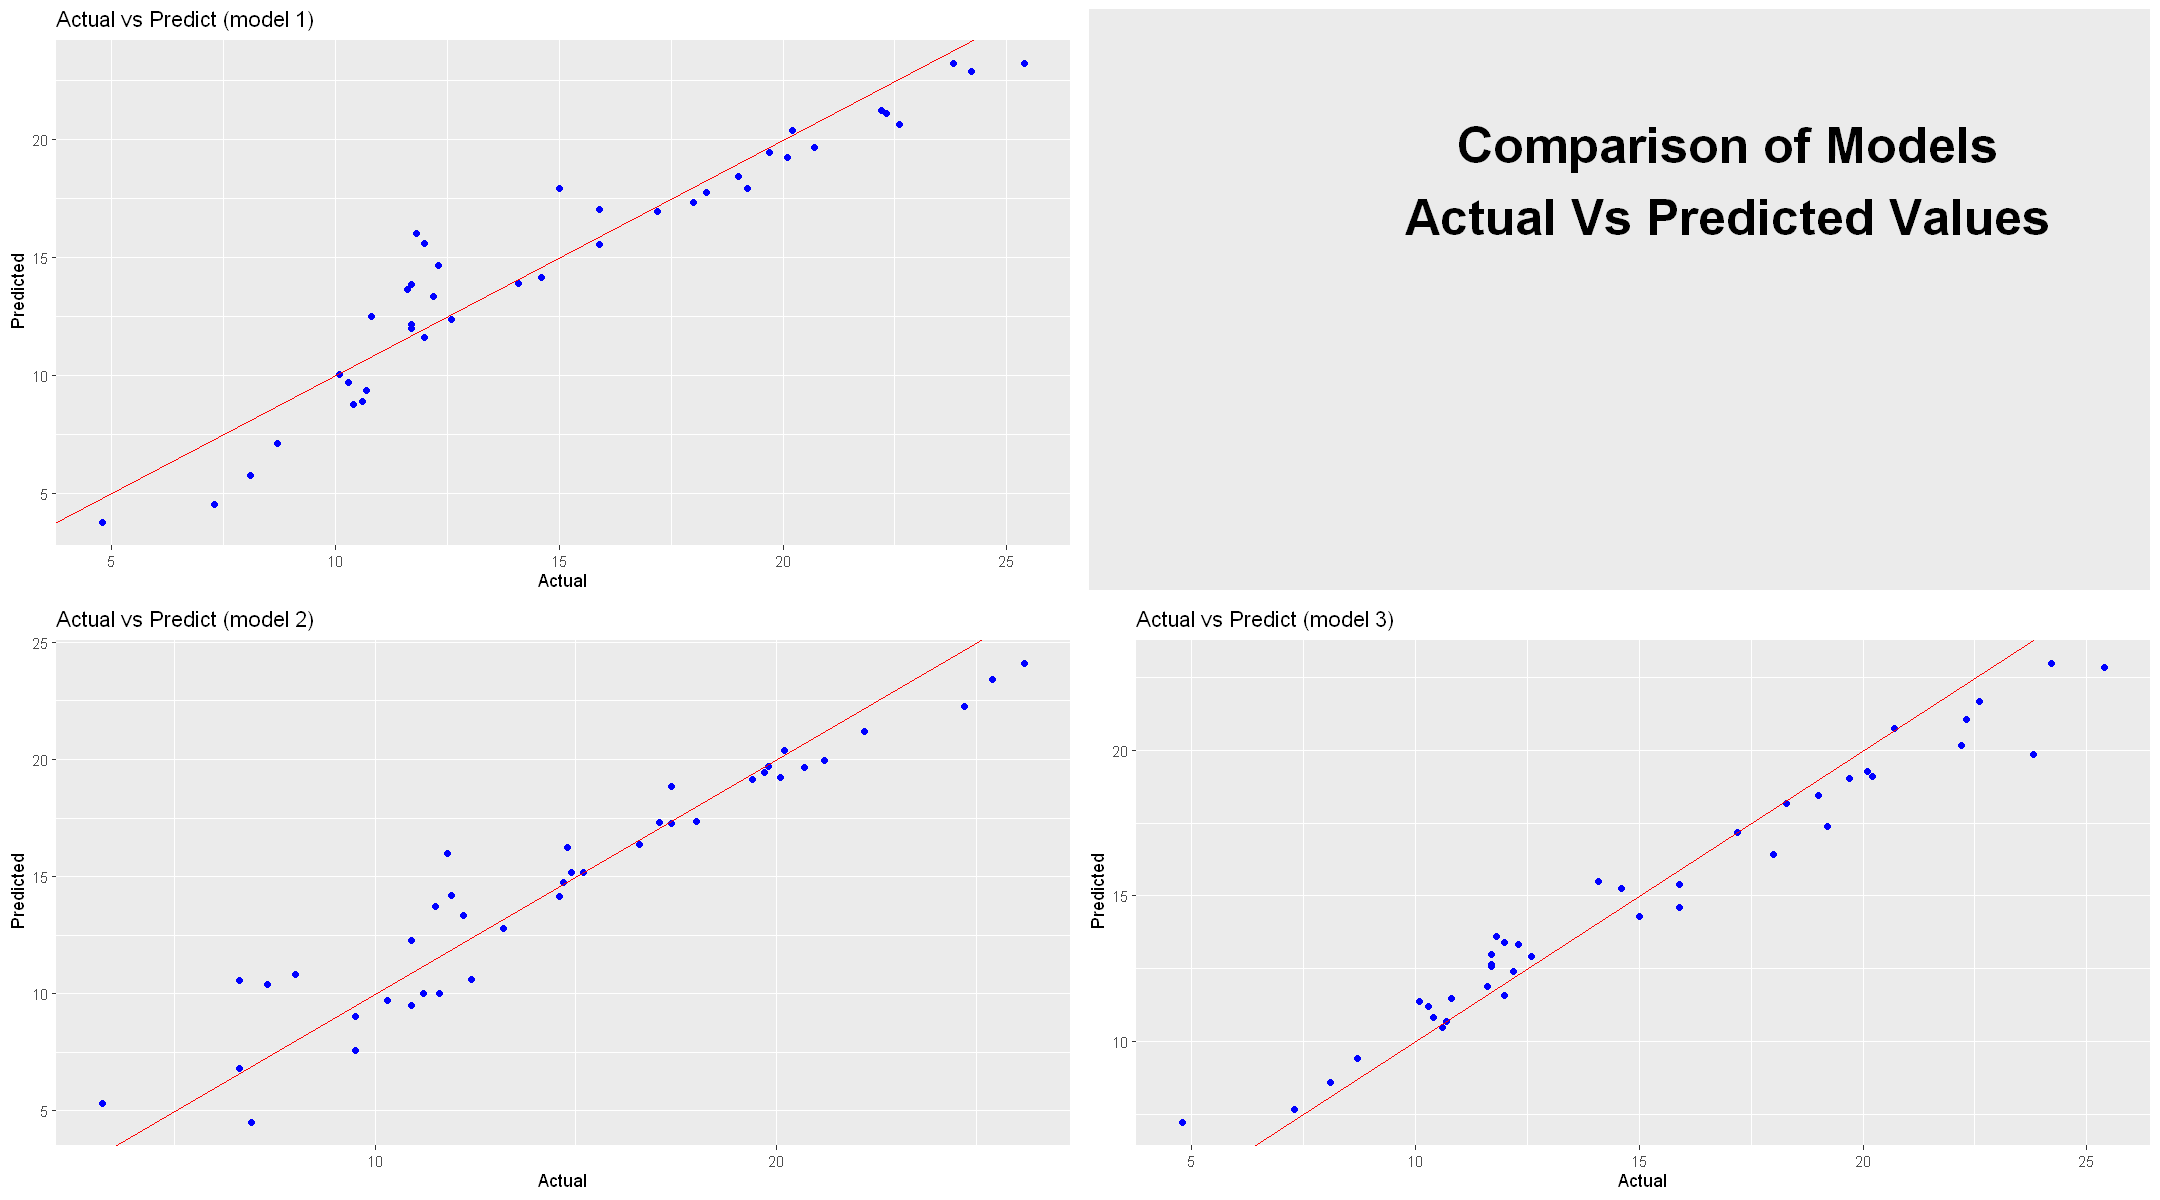

In [11]:
#visualizing the model

plot1 <- ggplot()+
  geom_point(aes(x = Test1$Sales,y = pred1),col = "blue")+
  geom_abline(slope = 1,intercept = 0,col = "red")+
  labs(title = "Actual vs Predict (model 1)",x = "Actual",
       y = " Predicted")

plot2<-ggplot() 

plot3 <- ggplot()+
  geom_point(aes(x = Test2$C_Sales,y = pred2),col = "blue")+
  geom_abline(slope = 1,intercept = 0,col = "red")+
  labs(title = "Actual vs Predict (model 2)",x = "Actual",
       y = " Predicted")

plot4 <- ggplot()+
  geom_point(aes(x = Test1$Sales,y = pred3),col = "blue")+
  geom_abline(slope = 1,intercept = 0,col = "red")+
  labs(title = "Actual vs Predict (model 3)",x = "Actual",
       y = " Predicted")
grid.arrange(plot1,plot2,plot3, plot4,nrow = 2, ncol = 2)
grid.text("Comparison of Models\nActual Vs Predicted Values", 
          x = 0.8, y = 0.85, gp = gpar(fontsize = 30, fontface = "bold"))


In [12]:
# cost or error function

#bias
B1 <- bias(Test1$Sales,pred1)
B2 <- bias(Test2$C_Sales,pred2)
B3 <- bias(Test1$Sales,pred3)

# rmse
rmse1 <- rmse(Test1$Sales,pred1)
rmse2 <- rmse(Test2$C_Sales,pred2)
rmse3 <- rmse(Test1$Sales,pred3)

#mse
mse1 <- mse(Test1$Sales,pred1)
mse2 <- mse(Test2$C_Sales,pred2)
mse3 <- mse(Test1$Sales,pred3)

#mae
mae1 <- mae(Test1$Sales,pred1)
mae2 <- mae(Test2$C_Sales,pred2)
mae3 <- mae(Test1$Sales,pred3)

# correlation
cor1 <- cor(Test1$Sales,pred1)
cor2 <- cor(Test2$C_Sales,pred2)
cor3 <- cor(Test1$Sales,pred3)

#R - square
r1 <- R2(Test1$Sales,pred1)
r2 <- R2(Test2$C_Sales,pred2)
r3 <- R2(Test1$Sales,pred3)


In [13]:
## Comparing Models Based on Various Parameters.
# creating parameter matrix
comparison_metrics <- data.frame(
  Model = c("Model1","Model2", "Model3"),
  Bias = c(B1, B2, B3),
  RMSE = c(rmse1, rmse2, rmse3),
  MSE = c(mse1, mse2, mse3),
  MAE = c(mae1, mae2, mae3),
  Correlation = c(cor1, cor2,cor3),
  R_Squared = c(r1,r2, r3)
)
print(comparison_metrics)

### CONCLUSION ###
### THE MODEL 3 IS THE BEST FIT AMONG ALL IF THE OVERALL EFFECT IS TAKEN IN ACCOUNT  ###
### IF CLEANED AND STRUCTURED DATA WHICH IS IMMUNE TO OUTLIERS IS NEEDED MODEL 2 IS BETTER OPTION ###

   Model       Bias     RMSE      MSE       MAE Correlation R_Squared
1 Model1  0.1526503 1.599915 2.559728 1.2638724   0.9520185 0.9063393
2 Model2 -0.0645042 1.676691 2.811294 1.2917821   0.9553691 0.9127301
3 Model3  0.1032581 1.251933 1.567335 0.9755369   0.9843755 0.9689952
